# Intervalos de confianza y Prueba de Hipótesis

Módulo 2 - Elementos de probabilidad y **estadística**

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos

Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---

Cargamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import ttest_1samp, ttest_ind # Para pruebas de hipótesis

## Distribución t de Student
Primero que nada tenemos que explicar la distribución t que se utiliza frecuentemente para las inferencias estadísticas.

La distribución t de Student, o mejor conocida simplemente como distribución t, es una distribución utilizada para estimar medias cuando la población se distribuye de forma normal y tomamos muestras pequeñas y desconocemos la desviación estandar poblacional.

La función de densidad es: $$
f(t) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
$$
donde:
- $t$ es la variable aleatoria.
- $\nu$ es el número de grados de libertad.
- $\Gamma$ es la función Gamma.

La media de la distribución es $0$ para valores de $\nu>1$. En caso contrario la media no está definida.

La varianza de la distribución t se define de la siguiente forma:$$
\text{Var}(t) =
\begin{cases}
\frac{\nu}{\nu - 2} & \text{si } \nu > 2 \\
\infty & \text{si } 1 < \nu \leq 2 \\
\text{no está definida} & \text{si } \nu \leq 1
\end{cases}
$$

Graficamos una distribución normal estándar y tres distribuciones t con distintos grados de libertad. Los grados de libertad, definidos como $\nu$ para la inferencia de medias se definen como el tamaño muestra menos 1 ($n-1$).

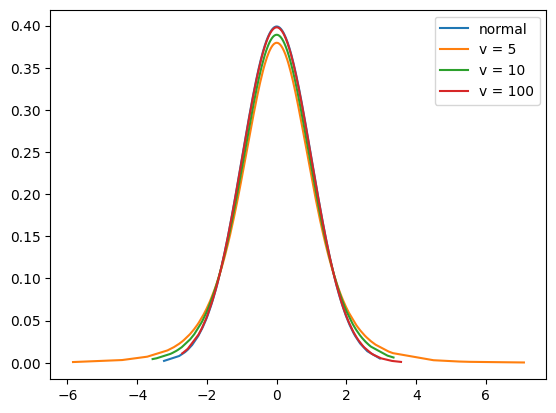

In [ ]:
np.random.seed(123)
x_norm = np.random.normal(loc=0, scale=1, size=500)
x_norm = np.sort(x_norm)

x_t_5 = np.random.standard_t(df=5, size=500)
x_t_5 = np.sort(x_t_5)

x_t_10 = np.random.standard_t(df=10, size=500)
x_t_10 = np.sort(x_t_10)

x_t_100 = np.random.standard_t(df=100, size=500)
x_t_100 = np.sort(x_t_100)

f_x_norm = stats.norm.pdf(x_norm, loc=0, scale=1)
f_x_t_5 = stats.t.pdf(x_t_5, df=5)
f_x_t_10 = stats.t.pdf(x_t_10, df=10)
f_x_t_100 = stats.t.pdf(x_t_100, df=100)

plt.plot(x_norm, f_x_norm, label="normal")
plt.plot(x_t_5, f_x_t_5, label="v = 5")
plt.plot(x_t_10, f_x_t_10, label="v = 10")
plt.plot(x_t_100, f_x_t_100, label="v = 100")
plt.legend()
plt.show()

## Intervalos de confianza

Dicho lo anterior, ¿para que nos sirven los valores $t$ de la anterior distribución?
La respuesta la encontramos en los **Intervalos de confianza** o de forma abreviada **IC**.

Los IC entran en juego en las estimaciones debido a que tenemos que asignar cierto error muestral a las mismas. Estos intervalos se definen como los límites dentro de los cuales si hicieramos muestras repetidas de la población, debería encontrarse la media poblacional una proporción prefijada de veces.

A esta proporción la denominamos con **Nivel de confianza** o **NC**. El más común y usado frecuentemente es un NC de 95%. Es decir, esperamos que en el 95% de los casos la media poblacional quede comprendida por el intervalo de confianza obtenido en cada muestra. Lo mismo es decir que esperamos que se equivoque un 5%, mejor conocido como **$\alpha$**. Y al NC lo definimos también como $(1-\alpha)$.

Para construir los *IC* necesitamos tomar muestras repetidas y asumiendo que el error $u$ se dsitribuye de forma $Normal(0,\sigma^2 )$ tenemos que la media muestral estandarizada se distribuye como una $t-Student$ con $n-1$ grados de libertad, siendo $n$ el tamaño muestral.

Por fórmula obtenemos: $$
t = \frac{\bar{y} - \mu_y}{\frac{s_y}{\sqrt{n}}}
$$

Una vez definidos los valores $t$ tenemos que encontrar los valores $t$ críticos o $t_c$ que contengan las proporciones antes definidas. Una vez hallamos dichos $t_c$ tenemos la siguiente premisa:
$$
-t_c \leq \frac{(\bar{y} -\mu_y)}{ee(\bar{y})} \leq t_c
$$

Luego despejando para $\mu_y$:
$$\bar{y}- t_c.ee(\bar{y}) \leq \mu_y \leq \bar{y}+ t_c.ee(\bar{y})$$

Ejemplo simulado

In [ ]:
mu = 30
sigma = 5
N = 100000
np.random.seed(123)
x = np.random.normal(loc=mu, scale=sigma, size=N)

n = 1000

Calculamos el valor t crítico para un 95% de confianza con los grados de libertad definidos por los tamaños muestrales $n-1$. En este caso obtenemos el valor t de la probabilidad acumulada del 97.5% en vez del 95% porque queremos que el valor $\alpha$ del 5% corresponda a ambos lados de la distribución, es decir 2.5% en cada cola. Dado que la distribución $t$ es simétrica a ambos lados basta con obtener el de un solo lado.

In [ ]:
stats.t.ppf(q=0.975, df=n-1)

1.9623414611334487

In [ ]:
stats.t.ppf(q=0.025, df=n-1)

-1.962341461133449

In [ ]:
lim_inf = []
lim_sup = []

muestra_t = []

iters = 100

t_c_95 = abs(stats.t.ppf(q=0.975, df=n-1))

np.random.seed(123)
for i in range(iters):
  muestra = np.random.choice(x, size=n, replace=True)

  t = (muestra.mean() - mu)/np.sqrt(muestra.var()/n)
  muestra_t.append(t)

  ee_x = np.sqrt(muestra.var()/n)

  lim_inf.append(muestra.mean() - t_c_95*ee_x)
  lim_sup.append(muestra.mean() + t_c_95*ee_x)

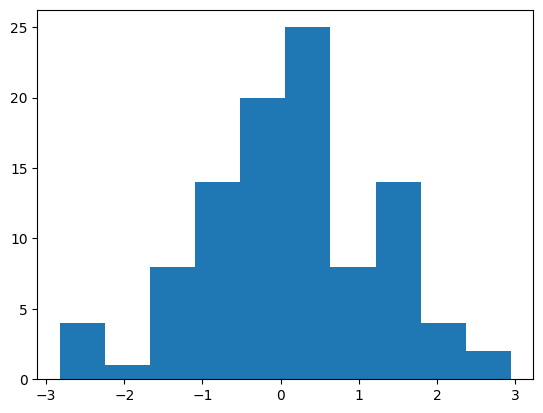

In [ ]:
plt.hist(muestra_t)
plt.show()

Sumamos las veces que es True que la media cae dentro del intervalo y luego obtenemos el promedio, nos debería dar cercano a 0.95

In [ ]:
porc_dentro = 0
for i in range(iters):
  if lim_inf[i] <= mu <= lim_sup[i]:
    porc_dentro += 1

In [ ]:
porc_dentro/iters*100

98.0

Ahora veamos que pasa en los peores casos de los rangos extremos.

Obtenemos el valor mínimo de los límites inferiores y su correspondiete valor del intervalo superior.

In [ ]:
lim_inf_min = min(lim_inf)
lim_inf_min_pos = lim_inf.index(lim_inf_min)
lim_sup_min = lim_sup[lim_inf_min_pos]

lim_sup_min - mu

-0.046892830814105224

Hacemos lo mismo pero tomando el máximo límite superior.

In [ ]:
lim_sup_max = max(lim_sup)
lim_sup_max_pos = lim_sup.index(lim_sup_max)
lim_inf_max = lim_sup[lim_sup_max_pos]

lim_inf_max - mu

0.6445695907439344

## Prueba de Hipótesis

Las pruebas de hipótesis nos sirver para saber si hay evidencia suficiente para rechazar o no una Hipótesis Nula.
Tenemos que la Hipótesis Nula o $H_0$ es que la media es igual a un número en específico por ejemplo $\mu_0$.
$$ H_0:\mu_y=\mu_0 $$

Luego tenemos las Hipótesis Alternativas o $H_1$ donde podemos tener tres casos:
$$ H_1:\mu_y \neq \mu_0 $$
$$ H_1:\mu_y > \mu_0 $$
$$ H_1:\mu_y < \mu_0 $$

Ejemplos prácticos con bases. Voy a utilizar una base de Alojamientos de AirBnb.

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la tabla
%cd "/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2"

Mounted at /content/drive
/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Seteo de directorio local

In [ ]:
#os.chdir('path)

In [ ]:
airbnb = pd.read_table("Bases/AlojamientosAirBnb.csv", sep=",")
airbnb.head()

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5


Suponemos que lo que tenemos es una muestra de todos los AirBnb de la zona. Obtenemos el tamaño muestral $n$, calculamos la media en este caso para la distancia hacia un estación de trenes.

In [ ]:
n = len(airbnb)
distancia_media = airbnb["distancia"].mean()
distancia_media

1033.2067528033988

Ahora supongamos que queremos analizar la posibilidad de que la media poblacional sea distinta de un número arbitrario por ejemplo 1000. Entonces tenemos las siguientes hipótesis:
$$ H_0:\mu_y=1000 $$
$$ H_1:\mu_y \neq 1000 $$

In [ ]:
mu_0 = 1000

error_estandar = np.sqrt(airbnb["distancia"].var()/n)

t = (distancia_media - mu_0)/error_estandar
t

5.156218429519946

Noten que si bien pongo un valor $\mu_y$ de 1000 me rechaza la $H_0$ fácilmente mientras que si pongo de 1030 no la rechaza. Esta diferencia viene marcada por un error estándar bajo, dada porque la variable 'distancia' tiene baja variabilidad alrededor de la media.

In [ ]:
error_estandar

6.440136944797818

Este resultado de la prueba ya nos da un valor bastante alto del estadístico t, indicativo de que podemos rechazar la $H_0$. Igualmente definimos un $t_c$ a un NC de 95% y comprobamos.

In [ ]:
t_95 = abs(stats.t.ppf(q=0.975, df=n-1))
t_95

1.9604037981614562

In [ ]:
t > t_95 or t < -t_95

True

In [ ]:
abs(t) > t_95

True

Otra forma es con la funcón ttest_1samp() que lleva de parámetros la muestra y la media poblacional testeada, que vendría a ser nuestra $H_0$.

In [ ]:
t = ttest_1samp(airbnb["distancia"], mu_0, alternative="two-sided")
t

TtestResult(statistic=5.156218429519947, pvalue=2.609808885966375e-07, df=5395)

Supongamos ahora que queremos verificar si hay evidencia suficiente para decir que la media poblacional es mayor al $\mu_y$ antes especificado. Debemos hallar el $t_c$ nuevamente para un NC de 95% pero solo a una cola, es decir utilizaremos 0.95 en vez de 0.975.

In [ ]:
t_95 = abs(stats.t.ppf(q=0.95, df=n-1))
t_95

1.6451361167430656

Nuevamente se ve que rechazamos la $H_0$, en este caso, de que la media sea igual o menor a 1000.

In [ ]:
abs(t) > t_95

True

Ahora realizaremos un Test de Hipótesis sobre proporciones, primero definiremos una variable binaria de si el alojamiento es para 2 personas o menos.

In [ ]:
airbnb["dos_personas"] = airbnb["personas"].apply(lambda x: 1 if x <= 2 else 0)

In [ ]:
airbnb["dos_personas"].value_counts()

dos_personas
1    3195
0    2201
Name: count, dtype: int64

Obtenemos la proporción de alojamientos en alquiler para 2 o menos personas.

In [ ]:
p_2 = airbnb["dos_personas"].mean()
p_2

0.5921052631578947

Ahora chequearemos la $H_0:p_y<0.5$

Para el caso de proporciones, al estar trabajando con una variable binomial, cambia la fórmula del desvío estándar muestral. Este nos queda igual a $ \sqrt{\frac{p(1-p)}{n}} $, por lo tanto, el valor $t$ queda:
$$
\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}
$$

Ahora supongamos que queremos rechazar la hipótes nula de que la proporción de alquileres para dos o menos personas representa menos del 50%. Tenemos que:
$$
H_o: p < 0.5
$$
$$H_1: p \geq 0.5$$


Obtenemos el $t_c$ correspondiente a un NC de 95% y comparamos el valor $t$.

In [ ]:
p = 0.5
n = len(airbnb)

t = (p - p_2)/np.sqrt(p*(1-p)/n)

t_95 = abs(stats.t.ppf(q=0.95, df=n-1))

In [ ]:
abs(t) > t_95

True

In [ ]:
t_05 = stats.t.ppf(q=0.05, df=n-1)
t<t_05

True

##Diferencia de medias

La $H_0$ y $H_1$ de diferencia de medias se define como:
$$ H_0:\mu^1_y - \mu^2_y = 0 $$
$$ H_1:\mu^1_y - \mu^2_y \neq 0 $$

Y el valor $t$ se construye de la siguiente forma:
$$ t = \frac{(\bar{y_1}-\bar{y_2})}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}} $$

Quiero analizar si hay evidencia significativa de que el precio de los alquileres de tipo "Entire home/apt" es distinto de los de tipo "Private room".

In [ ]:
y1 = airbnb[airbnb["tipo"] == "Entire home/apt"]["precio"]
y2 = airbnb[airbnb["tipo"] == "Private room"]["precio"]

In [ ]:
y1_media = y1.mean()
y2_media = y2.mean()


s1 = y1.var()
s2 = y2.var()

n1 = len(y1)
n2 = len(y2)

In [ ]:
print(f'Precio promedio de una casa/dpto completo: {y1_media}')
print(f'Precio promedio de una habitación privada: {y2_media}')

Precio promedio de una casa/dpto completo: 82.83225458468176
Precio promedio de una habitación privada: 44.55427103403982


In [ ]:
t = (y1_media - y2_media)/(np.sqrt(s1/n1 + s2/n2))
t

12.150671542946586

Calculamos el valor $t_c$. Tener en cuenta que los grados de libertad ya no se basan en el tamaño muestral original menos 1 sino en la suma de $n_1$ y $n_2$ menos 2.

In [ ]:
t_95 = abs(stats.t.ppf(q=0.975, df=n1+n2-2))
abs(t) > t_95

True

Vemos los histogramas.

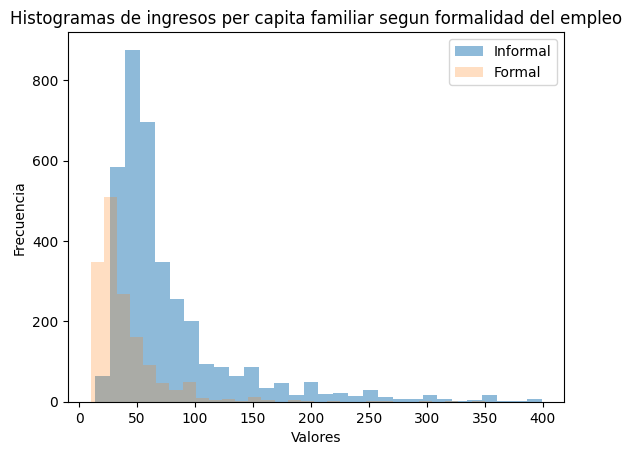

In [ ]:
plt.hist(y1[y1<400], bins=30, alpha=0.5, label='Informal')
plt.hist(y2[y2<400], bins=30, alpha=0.25, label='Formal')
plt.legend(loc='upper right')
plt.title('Histogramas de ingresos per capita familiar segun formalidad del empleo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
ttest_ind(y1, y2, equal_var=False)

TtestResult(statistic=12.150671542946586, pvalue=5.853049744437594e-33, df=2271.841276659903)